In [4]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#### A simple self-attention mechanism without trainable weights

#### SOURCE: [Raschka, Sebastian. Build a Large Language Model (From Scratch). Simon and Schuster, 2024.](https://www.simonandschuster.com/books/Build-a-Large-Language-Model-From-Scratch/Sebastian-Raschka/9781394200867)

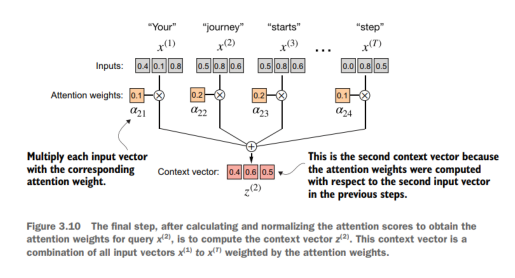

In [5]:
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\attention-naive.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your (x^1)
[0.55, 0.87, 0.66], # journey (x^2)
[0.57, 0.85, 0.64], # starts (x^3)
[0.22, 0.58, 0.33], # with (x^4)
[0.77, 0.25, 0.10], # one (x^5)
[0.05, 0.80, 0.55]] # step (x^6)
)

In [7]:
print(inputs.shape)

torch.Size([6, 3])


In [8]:
query = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0]) # tensor to store the computed attention scores
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [9]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum() #  normalize each of the attention scores to obtain attention weights
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [10]:
#  it’s more common and advisable to use the softmax function for normalization.
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)
    
attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

#  the softmax function ensures that the attention weights are always positive. 
#  This makes the output interpretable as probabilities or relative importance,
#  where higher weights indicate greater importance.

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [11]:
#  PyTorch implementation of softmax
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [12]:
# calculating the context vector 2
query = inputs[1]
context_vec_2 = torch.zeros(query.shape)

for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


In [13]:
# compute all attention scores at once with for loop
attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [14]:
#  compute all atention scores at once with matrix multiplication 
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [15]:
# compute attention weights
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [16]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [17]:
# compute context vectors
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [18]:
# the entire process at once
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your (x^1)
[0.55, 0.87, 0.66], # journey (x^2)
[0.57, 0.85, 0.64], # starts (x^3)
[0.22, 0.58, 0.33], # with (x^4)
[0.77, 0.25, 0.10], # one (x^5)
[0.05, 0.80, 0.55]] # step (x^6)
)

attn_scores = inputs @ inputs.T
attn_weights = torch.softmax(attn_scores, dim=-1)
all_context_vecs = attn_weights @ inputs
#print(torch.matmul(attn_weights, inputs))
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


#### Implementing self attention mechanism with trainable weights

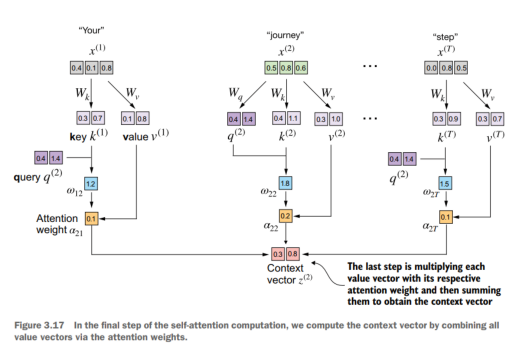

In [19]:
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\self-attention2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
x_2 = inputs[1]
d_in = inputs.shape[1] # inpout dimension
d_out = 2 # output dimension

In [21]:
# initialize weight matrices
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=True)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=True)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=True)

In [22]:
# compute query, key, and value vectors.
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)
print(key_2)
print(value_2)

tensor([0.4306, 1.4551], grad_fn=<SqueezeBackward4>)
tensor([0.4433, 1.1419], grad_fn=<SqueezeBackward4>)
tensor([0.3951, 1.0037], grad_fn=<SqueezeBackward4>)


### Weight parameters vs. attention weights
#### In the weight matrices W, the term “weight” is short for “weight parameters,” the values of a neural network that are optimized during training. This is not to be confused with the attention weights. As we already saw, attention weights determine the extent to which a context vector depends on the different parts of the input (i.e., to what extent the network focuses on different parts of the input).

#### In summary, weight parameters are the fundamental, learned coefficients that define the network’s connections, while attention weights are dynamic, context-specific values.

In [23]:
#  obtain all keys and values via matrix multiplication
keys = inputs @ W_key
values = inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [24]:
#  let’s compute the attention score ω22
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524, grad_fn=<DotBackward0>)


In [25]:
# compute all attention scores
attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
       grad_fn=<SqueezeBackward4>)


In [26]:
# go from the attention scores to the attention weights.
# compute the attention weights by scaling the attention scores and using the softmax function.
# we scale the attention scores by dividing them by the square root of the embedding dimension of the keys.
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)
# The reason for the normalization by the embedding dimension size is to improve the
# training performance by avoiding small gradients. For instance, when scaling up the
# embedding dimension, which is typically greater than 1,000 for GPT-like LLMs, large
# dot products can result in very small gradients during backpropagation due to the
# softmax function applied to them. As dot products increase, the softmax function
# behaves more like a step function, resulting in gradients nearing zero. These small
# gradients can drastically slow down learning or cause training to stagnate.
# The scaling by the square root of the embedding dimension is the reason why this
# self-attention mechanism is also called scaled-dot product attention.

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
       grad_fn=<SoftmaxBackward0>)


In [27]:
# compute the context vector z2 
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210], grad_fn=<SqueezeBackward4>)


### Why query, key, and value?
#### The terms “key,” “query,” and “value” in the context of attention mechanisms are borrowed from the domain of information retrieval and databases, where similar concepts are used to store, search, and retrieve information. A query is analogous to a search query in a database. It represents the current item (e.g., a word or token in a sentence) the model focuses on or tries to understand. The query is used to probe the other parts of the input sequence to determine how much attention to pay to them. The key is like a database key used for indexing and searching. In the attention mechanism, each item in the input sequence (e.g., each word in a sentence) has an associated key. These keys are used to match the query. The value in this context is similar to the value in a key-value pair in a database. It represents the actual content or representation of the input items. Once the model determines which keys (and thus which parts of the input) are most relevant to the query (the current focus item), it retrieves the corresponding values.

In [28]:
# Impleneting self-attention as a python class
class SelfAttention(torch.nn.Module):
    
    def __init__(self, d_in, d_out):
        
        super().__init__()
        self.W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=True)
        self.W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=True)
        self.W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=True)

    def forward(self, x):
        
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        context_vec = attn_weights @ values
        
        return context_vec

In [29]:
torch.manual_seed(123)
sa_v1 = SelfAttention(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [30]:
# We can improve the SelfAttention implementation further by utilizing
# PyTorch’s nn.Linear layers, which effectively perform matrix multiplication when
# the bias units are disabled. 
class SelfAttention1(torch.nn.Module):
    
    def __init__(self, d_in, d_out, qkv_bias=False):
        
        super().__init__()
        self.W_query = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = torch.nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        context_vec = attn_weights @ values
        
        return context_vec

In [31]:
torch.manual_seed(789)
sa_v2 = SelfAttention1(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [32]:
# Comparing SelfAttention and SelfAttention1
torch.manual_seed(0)
d_in, d_out = 4, 3
x = torch.rand(5, d_in)  # Example input tensor

# Initialize both versions
self_attention = SelfAttention(d_in, d_out)
self_attention1 = SelfAttention1(d_in, d_out)

# Transfer weights from SelfAttention1 to SelfAttention
self_attention.W_query.data = self_attention1.W_query.weight.data.T
self_attention.W_key.data = self_attention1.W_key.weight.data.T
self_attention.W_value.data = self_attention1.W_value.weight.data.T

# Forward pass through both to compare outputs
output1 = self_attention(x)
output2 = self_attention1(x)

# Compare outputs
print("Output of SelfAttention:\n", output1)
print("Output of SelfAttention1:\n", output2)
print("Are outputs close?", torch.allclose(output1, output2, atol=1e-6))

Output of SelfAttention:
 tensor([[-0.0378, -0.1419,  0.0664],
        [-0.0394, -0.1436,  0.0694],
        [-0.0382, -0.1422,  0.0673],
        [-0.0370, -0.1406,  0.0652],
        [-0.0383, -0.1424,  0.0671]], grad_fn=<MmBackward0>)
Output of SelfAttention1:
 tensor([[-0.0378, -0.1419,  0.0664],
        [-0.0394, -0.1436,  0.0694],
        [-0.0382, -0.1422,  0.0673],
        [-0.0370, -0.1406,  0.0652],
        [-0.0383, -0.1424,  0.0671]], grad_fn=<MmBackward0>)
Are outputs close? True


### Hiding future words with causal attention

#### For many LLM tasks, you will want the self-attention mechanism to consider only the tokens that appear prior to the current position when predicting the next token in a sequence. Causal attention, also known as masked attention, is a specialized form of selfattention. It restricts a model to only consider previous and current inputs in a sequence when processing any given token when computing attention scores. This is in contrast to the standard self-attention mechanism, which allows access to the entire input sequence at once.

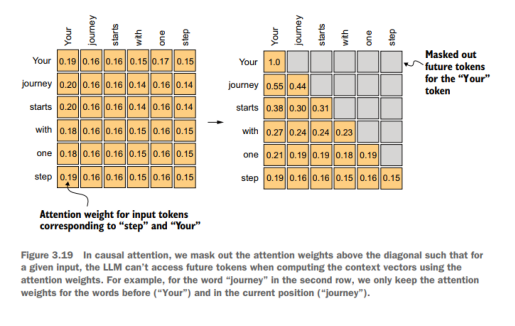

In [33]:
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\causal-attention.png')
plt.imshow(img)
plt.axis('off')
plt.show()

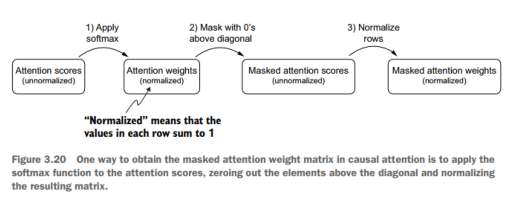

In [34]:
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\causal-attention2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [35]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [37]:
context_length = attn_scores.shape[0]
# torch.tril(input, diagonal=0, *, out=None): Returns the lower triangular part of the matrix (2-D tensor)
# or batch of matrices input, the other elements of the result tensor out are set to 0.
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [38]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [39]:
row_sums = masked_simple.sum(dim=-1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


In [41]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [42]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [44]:
# Masking additional attention weights with dropout
# In the transformer architecture, including models like GPT,
# dropout in the attention mechanism is typically applied at two specific times:
# after calculating the attention weights or after applying
# the attention weights to the value vectors. 
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6, 6)
print(example)
print(dropout(example))

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [45]:
#When applying dropout to an attention weight matrix with a rate of 50%, half of the
#elements in the matrix are randomly set to zero. To compensate for the reduction in
#active elements, the values of the remaining elements in the matrix are scaled up by a
#factor of 1/0.5 = 2. This scaling is crucial to maintain the overall balance of the atten-
#tion weights, ensuring that the average influence of the attention mechanism remains
#consistent during both the training and inference phases.

In [46]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


In [48]:
# Implementing a compact causal attention class

# But before we begin, let’s ensure that the code can handle batches consisting of
# more than one input so that the CausalAttention class supports the batch outputs
# produced by the data loader
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [50]:
class CausalAttention(torch.nn.Module):
    
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        
        super().__init__()
        self.d_out = d_out
        self.W_query = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = torch.nn.Dropout(dropout)
        # buffers are automatically moved to the appropriate device (CPU or GPU) along with our model, which will
        # be relevant when training our LLM. This means we don’t need to manually ensure
        # these tensors are on the same device as your model parameters, avoiding device mismatch errors.
        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )

    def forward(self, x):
        
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.transpose(1, 2) # We transpose dimensions 1 and 2, keeping the batch dimension at the first position (0).
        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf) # In PyTorch, operations with a trailing underscore are performed in-place, avoiding unnecessary memory copies.
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights)
        context_vec = attn_weights @ values
        
        return context_vec

In [54]:
torch.manual_seed(123)
d_in = 3 
d_out = 2
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


### Extending single-head attention to multi-head attention

#### the main idea behind multi-head attention is to run the attention mechanism multiple times (in parallel) with different, learned linear projections—the results of multiplying the input data (like the query, key, and value vectors in attention mechanisms) by a weight matrix. 

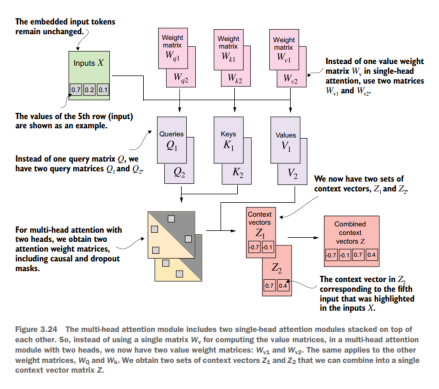

In [55]:
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\multihead-attention.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [56]:
class MultiHeadAttentionWrapper(torch.nn.Module):
    
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = torch.nn.ModuleList(
            [CausalAttention( d_in, d_out, context_length, dropout, qkv_bias) for _ in range(num_heads)]
        )
        
    def forward(self, x):
        
        return torch.cat([head(x) for head in self.heads], dim=-1)

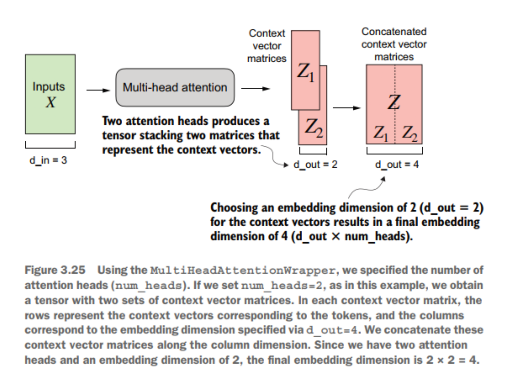

In [58]:
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\multihead-attention1.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [62]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


### Implementing multi-head attention with weight splits
##### On a big-picture level, in the previous MultiHeadAttentionWrapper, we stacked multiple single-head attention layers that we combined into a multi-head attention layer. The MultiHeadAttention class takes an integrated approach. It starts with a multi-head layer and then internally splits this layer into individual attention heads. The splitting of the query, key, and value tensors is achieved through tensor reshaping and transposing operations using PyTorch’s .view and .transpose methods. The input is first transformed (via linear layers for queries, keys, and values) and then reshaped to represent multiple heads. The key operation is to split the d_out dimension into num_heads and head_dim, where head_dim = d_out / num_heads. This splitting is then achieved using the .view method: a tensor of dimensions (b, num_tokens, d_out) is reshaped to dimension (b, num_tokens, num_heads, head_dim).

##### The tensors are then transposed to bring the num_heads dimension before the num_tokens dimension, resulting in a shape of (b, num_heads, num_tokens, head_dim). This transposition is crucial for correctly aligning the queries, keys, and values across the different heads and performing batched matrix multiplications efficiently.

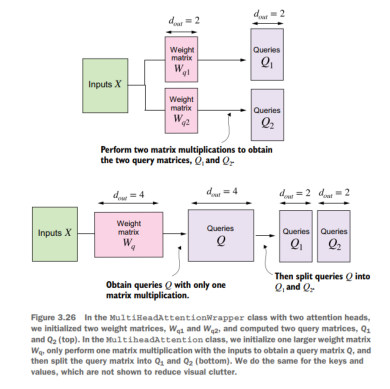

In [66]:
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\multihead-attention2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [67]:
class MultiHeadAttention(torch.nn.Module):
    
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        
        super().__init__()
        assert (d_out % num_heads == 0), "d_out must be divisible by num_heads"
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduces the projection dim to match the desired output dim
        self.W_query = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = torch.nn.Linear(d_out, d_out) # Uses a Linear layer to combine head outputs
        self.dropout = torch.nn.Dropout(dropout)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))
        
    def forward(self, x):
        
        # Tensor shape: (b,num_tokens, d_out)
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a num_heads dimension.
        # Then we unroll the last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim).
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transposes from shape (b, num_tokens, num_heads, head_dim) to (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)
        
        attn_scores = queries @ keys.transpose(2, 3) # Computes dot product for each head
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens] # Masks truncated to the number of tokens
        attn_scores.masked_fill_(mask_bool, -torch.inf) # Uses the mask to fill attention scores
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        
        context_vec = (attn_weights @ values).transpose(1, 2) # Tensor shape: (b, num_tokens, n_heads, head_dim)
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # Adds an optional linear projection
        
        return context_vec

In [68]:
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
                    [0.8993, 0.0390, 0.9268, 0.7388],
                    [0.7179, 0.7058, 0.9156, 0.4340]],
                   [[0.0772, 0.3565, 0.1479, 0.5331],
                    [0.4066, 0.2318, 0.4545, 0.9737],
                    [0.4606, 0.5159, 0.4220, 0.5786]]]])

In [69]:
print(a @ a.transpose(2, 3))

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


In [70]:
first_head = a[0, 0, :, :]
first_res = first_head @ first_head.T
print("First head:\n", first_res)
second_head = a[0, 1, :, :]
second_res = second_head @ second_head.T
print("\nSecond head:\n", second_res)

First head:
 tensor([[1.3208, 1.1631, 1.2879],
        [1.1631, 2.2150, 1.8424],
        [1.2879, 1.8424, 2.0402]])

Second head:
 tensor([[0.4391, 0.7003, 0.5903],
        [0.7003, 1.3737, 1.0620],
        [0.5903, 1.0620, 0.9912]])


In [71]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])
